In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%%bash
wget "https://pjreddie.com/media/files/yolov3.weights"

--2023-07-10 08:52:33--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

     0K .......... .......... .......... .......... ..........  0%  708K 5m42s
    50K .......... .......... .......... .......... ..........  0%  718K 5m40s
   100K .......... .......... .......... .......... ..........  0% 27.4M 3m49s
   150K .......... .......... .......... .......... ..........  0% 1.23M 3m40s
   200K .......... .......... .......... .......... ..........  0% 1.63M 3m25s
   250K .......... .......... .......... .......... ..........  0% 79.5M 2m51s
   300K .......... .......... .......... .......... ..........  0% 35.6M 2m28s
   350K .......... .......... .......... .......... ..........  0% 1.26M 2m32s
   400K .......... .......... .......

In [ ]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2023-07-10 08:58:24--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

     0K ........                                              100% 33.4M=0s

2023-07-10 08:58:24 (33.4 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2023-07-10 09:00:01--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

     0K                                                       100% 32.6M=0s

2023-07-10 09:00:02 (32.6 MB/s) - ‘coco.names’ saved [625/625]



In [ ]:
import cv2
import numpy as np
import time
import sys
import os

In [ ]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.5

# the neural network configuration
config_path = "yolov3.cfg"
# the YOLO net weights file
weights_path = "yolov3.weights"
# weights_path = "weights/yolov3-tiny.weights"

# loading all the class labels (objects)
labels = open("coco.names").read().strip().split("\n")
# generating colors for each object for later plotting
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")

In [ ]:
# load the YOLO network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [ ]:
cv2.__version__

'4.7.0'

In [ ]:
path_name = "cat.webp"
image = cv2.imread(path_name)
file_name = os.path.basename(path_name)
filename, ext = file_name.split(".")

In [ ]:
image[:2].shape

(2, 1920, 3)

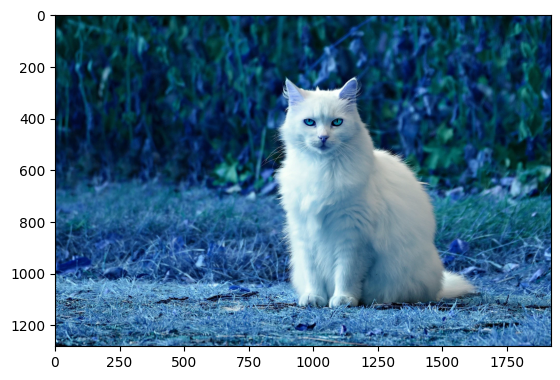

In [ ]:
plt.imshow(image)

In [ ]:
h, w = image.shape[:2]
# create 4D blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

In [ ]:
blob

array([[[[0.1137255 , 0.1254902 , 0.10980393, ..., 0.40784317,
          0.44705886, 0.3529412 ],
         [0.10980393, 0.10980393, 0.10980393, ..., 0.43921572,
          0.44705886, 0.3803922 ],
         [0.10980393, 0.1137255 , 0.10980393, ..., 0.454902  ,
          0.45098042, 0.36862746],
         ...,
         [0.3529412 , 0.3019608 , 0.18823531, ..., 0.74509805,
          0.69803923, 0.8196079 ],
         [0.18823531, 0.07843138, 0.14509805, ..., 0.654902  ,
          0.44705886, 0.9490197 ],
         [0.07843138, 0.06666667, 0.09411766, ..., 0.6313726 ,
          0.6       , 0.78823537]],

        [[0.1137255 , 0.1254902 , 0.10980393, ..., 0.21568629,
          0.2392157 , 0.19215688],
         [0.10588236, 0.10980393, 0.10588236, ..., 0.25490198,
          0.2392157 , 0.21568629],
         [0.10588236, 0.1137255 , 0.10588236, ..., 0.2784314 ,
          0.2509804 , 0.21176472],
         ...,
         [0.20392159, 0.23137257, 0.10196079, ..., 0.5019608 ,
          0.47450984, 0.6

In [ ]:
print("image.shape:", image.shape)
print("blob.shape:", blob.shape)

image.shape: (1281, 1920, 3)
blob.shape: (1, 3, 416, 416)


In [ ]:
ln = net.getLayerNames()

In [ ]:
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [ ]:
len(ln)

254

In [ ]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [ ]:
# sets the blob as the input of the network
net.setInput(blob)
# get all the layer names
ln = net.getLayerNames()
try:
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except IndexError:
    # in case getUnconnectedOutLayers() returns 1D array when CUDA isn't available
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
# feed forward (inference) and get the network output
# measure how much it took in seconds
start = time.perf_counter()
layer_outputs = net.forward(ln)
time_took = time.perf_counter() - start
print(f"Time took: {time_took:.2f}s")

Time took: 1.11s


In [ ]:
font_scale = 0.5
thickness = 2
boxes, confidences, class_ids = [], [], []
# loop over each of the layer outputs
for output in layer_outputs:
    # loop over each of the object detections
    for detection in output:
        # extract the class id (label) and confidence (as a probability) of
        # the current object detection
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        # discard out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > CONFIDENCE:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
boxes

[[819, 234, 697, 875],
 [834, 218, 810, 919],
 [831, 281, 672, 835],
 [838, 245, 811, 905]]

In [ ]:
print(detection.shape)

(85,)


In [ ]:
# loop over the indexes we are keeping
for i in range(len(boxes)):
    # extract the bounding box coordinates
    x, y = boxes[i][0], boxes[i][1]
    w, h = boxes[i][2], boxes[i][3]
    # draw a bounding box rectangle and label on the image
    color = [int(c) for c in colors[class_ids[i]]]
    cv2.rectangle(image, (x, y), (x + w, y + h), color=color, thickness=thickness)
    text = f"{labels[class_ids[i]]}: {confidences[i]:.2f}"
    # calculate text width & height to draw the transparent boxes as background of the text
    (text_width, text_height) = cv2.getTextSize(
        text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
    text_offset_x = x
    text_offset_y = y - 5
    box_coords = ((text_offset_x, text_offset_y),
     (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = image.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color,
                  thickness=cv2.FILLED)
    # add opacity (transparency to the box)
    image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
    # now put the text (label: confidence %)
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=font_scale, color=(0, 0, 0), thickness=thickness)

In [ ]:
cv2.imwrite(filename + "_yolo3." + ext, image)

True

In [ ]:
confidences

[0.7805012464523315,
 0.9942320585250854,
 0.6914936304092407,
 0.9717046022415161]